In [1]:
from pandas import DataFrame, Series
import numpy as np

In [26]:
df = DataFrame(np.random.randn(4,3), index=[Series([1,1, 2,2], name="stud_id"),Series([0,1, 0,1], name="action_id")])

In [27]:
df

0         1         2
stud_id action_id                              
1       0         -0.656581 -0.772974  1.352807
        1         -0.578143 -0.485653  2.247775
2       0          0.026182  0.077298  0.413197
        1         -1.511151  0.482022 -0.204731

In [18]:
df.index.get_level_values("stud_id").values

array([1, 1])

In [23]:
dff = DataFrame([3,8])
dff.index = df.index.get_level_values("stud_id")
dff

,0
stud_id,
1,3
1,8


In [1]:
from Preprocessing import Preprocessing

In [3]:
pre = Preprocessing()
X, y = pre.load_data(return_as_df=True, summarize=True, time_gap=1, include_studId=True)
X_per_stud, y_per_stud = pre.load_data(return_as_df=True, summarize=True)

/home/farzad/RIL/LSTM/Preprocessing.py:131: DtypeWarning: Columns (74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  self.raw_dataset = pd.concat((pd.read_csv(f, dtype=self.col_dtype) for f in data_files))


prepared dataset contains: per_stud_dataset + per_action_dataset_summ
prepared dataset contains: per_stud_dataset + per_action_dataset_summ


In [2]:
pre = Preprocessing()
X, y = pre.load_data(return_as_df=True, summarize=True, include_studId=True)

/home/farzad/RIL/LSTM/Preprocessing.py:131: DtypeWarning: Columns (74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  self.raw_dataset = pd.concat((pd.read_csv(f, dtype=self.col_dtype) for f in data_files))


prepared dataset contains: per_stud_dataset + per_action_dataset_summ


In [3]:
X_actions, y_actions = pre.load_data(return_as_df=True, include_studId=True)

/home/farzad/RIL/LSTM/Preprocessing.py:131: DtypeWarning: Columns (74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  self.raw_dataset = pd.concat((pd.read_csv(f, dtype=self.col_dtype) for f in data_files))


prepared dataset contains: per_action_dataset
There is no seq_ix column to remove!
Warning! There is no label column in this setting!


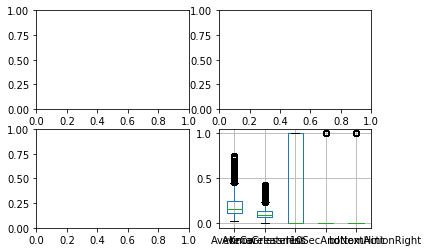

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2,2)
pre.raw_dataset.boxplot(["AveKnow", "AveCarelessness", "hint", "timeGreater10SecAndNextActionRight", "bottomHint"])

In [9]:
%matplotlib inline

In [11]:
from pandas import DataFrame
per_stud = DataFrame({"per_stud":y_per_stud})
per_action = DataFrame({"per_action":y})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1a49e2978>]], dtype=object)

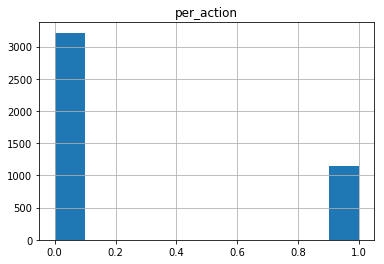

In [12]:
per_action.hist()

4362

In [2]:
from pandas import DataFrame
from sklearn.model_selection import GroupShuffleSplit

In [3]:
data = DataFrame.from_csv("New Dataset/student_log_1.csv")
data['ITEST_id'] = data.index

In [16]:
dkf = GroupShuffleSplit(n_splits=3,train_size=.75)

/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1364: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
labels = DataFrame.from_csv("New Dataset/training_label.csv")
labels['ITEST_id'] = labels.index
data = data.merge(labels, on='ITEST_id')

In [21]:
train_ix, test_ix = next(dkf.split(data.drop("isSTEM", axis=1), data['isSTEM'], groups=data['ITEST_id']))

In [52]:
x_train, x_test = data.drop("isSTEM",axis=1).iloc[train_ix], data.drop("isSTEM",axis=1).iloc[test_ix]
y_train, y_test = data["isSTEM"].iloc[train_ix], data["isSTEM"].iloc[test_ix]

In [57]:
df.drop(["ix"],axis=1)

,a,b
0,1,10
1,2,11
2,3,12
3,4,13
4,5,14
5,6,15
6,7,16
7,8,17
8,9,18
9,10,19


In [73]:
df = DataFrame({"id": [1,1,1,3,3,3,3,3,2], "pred":[0,1,1,0,0,0,1,1,1]})

In [74]:
df2 = DataFrame(df.groupby('id').size(), columns=["size"])

In [82]:
df

,id,pred
0,1,0
1,1,1
2,1,1
3,3,0
4,3,0
5,3,0
6,3,1
7,3,1
8,2,1


In [84]:
df

,id,pred,isS
0,1,0,1
1,1,1,1
2,1,1,1
3,3,0,0
4,3,0,0
5,3,0,0
6,3,1,0
7,3,1,0
8,2,1,1


In [89]:
df2['isSTEM'] = df.groupby("id")['isS'].first().values

In [90]:
df.groupby("id")['isS'].first().values

array([1, 1, 0])

In [91]:
nn = np.array([1,2,3,4,5,6,6])

In [92]:
nn.take([1,3])

array([2, 4])

In [144]:
np.random.randint(low=0, high=2, size=3)

array([0, 1, 0])

In [88]:
df2

,size,isS,isSTEM
id,,,
1,3,2,1
2,1,1,1
3,5,2,0


In [75]:
df2['isS'] = df.groupby("id")['pred'].sum()

In [76]:
df2

,size,isS
id,,
1,3,2
2,1,1
3,5,2


In [53]:
type(x_train)

pandas.core.frame.DataFrame

In [25]:
from pandas import Series
s = Series(range(1,10))

In [28]:
s

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [27]:
s.take([2,4],axis=0)

2    3
4    5
dtype: int64

In [34]:
import numpy as np
df = DataFrame({"a":np.arange(1,11), "b": np.arange(10, 20)})

In [35]:
indicies = [1]*3 + [2]*2 + [3]*5
df['ix'] = indicies

In [38]:
from itertools import chain

In [45]:
df.iloc[[1,3]]

,a,b,ix
1,2,11,1
3,4,13,2


In [79]:
train_index, test_index = dkf.split(df, df.index, groups=df["ix"])

In [80]:
train_index

(array([0, 1, 2, 5, 6, 7, 8, 9]), array([3, 4]))

In [81]:
test_index

(array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9]))

In [73]:
df

,a,b,ix
0,1,10,1
1,2,11,1
2,3,12,1
3,4,13,2
4,5,14,2
5,6,15,3
6,7,16,3
7,8,17,3
8,9,18,3
9,10,19,3


In [145]:
training_label = DataFrame.from_csv("New Dataset/training_label.csv")

In [162]:
training_label_sample = training_label.sample(10)

,SchoolId,AveCorrect,MCAS,isSTEM
ITEST_id,,,,
1788,1,0.360825,33,1
6298,1,0.279588,29,1
7629,4,0.294872,-999,0
7062,1,0.479452,30,0
4703,2,0.401130,33,1
5778,2,0.304511,21,0
6939,2,0.513514,51,1
6048,4,0.430959,42,0
6615,2,0.422989,42,1


In [164]:
training_label_sample.to_csv("Sample Dataset/training_label.csv")

In [167]:
import glob, os
import pandas as pd
data_files = glob.glob(os.path.join("New Dataset", "student_log_*.csv"))
training_data = pd.concat((pd.read_csv(f) for f in data_files))
training_data

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


,AveCarelessness,AveCorrect,AveKnow,AveResBored,AveResConf,AveResEngcon,AveResFrust,AveResGaming,AveResOfftask,ITEST_id,...,timeOver80,timeSinceSkill,timeTaken,totalFrAttempted,totalFrPastWrongCount,totalFrPercentPastWrong,totalFrSkillOpportunities,totalFrSkillOpportunitiesByScaffolding,totalFrTimeOnSkill,totalTimeByPercentCorrectForskill
0,0.085863,0.374477,0.169394,0.284355,0.125601,0.611127,0.137238,0.019325,0.219408,922,...,1,0.0,144.0,0,0,0.000000,0,0.000000,0.0,0.000000
1,0.085863,0.374477,0.169394,0.284355,0.125601,0.611127,0.137238,0.019325,0.219408,922,...,0,0.0,13.0,1,0,0.000000,1,0.000000,0.0,0.000000
2,0.085863,0.374477,0.169394,0.284355,0.125601,0.611127,0.137238,0.019325,0.219408,922,...,1,0.0,98.0,1,0,0.000000,1,0.000000,0.0,0.000000
3,0.085863,0.374477,0.169394,0.284355,0.125601,0.611127,0.137238,0.019325,0.219408,922,...,1,0.0,81.0,1,0,0.000000,1,0.000000,0.0,0.000000
4,0.085863,0.374477,0.169394,0.284355,0.125601,0.611127,0.137238,0.019325,0.219408,922,...,0,0.0,9.0,1,0,0.000000,1,0.000000,0.0,0.000000
5,0.085863,0.374477,0.169394,0.284355,0.125601,0.611127,0.137238,0.019325,0.219408,922,...,0,0.0,20.0,1,0,0.000000,1,0.000000,0.0,2189.999998
6,0.085863,0.374477,0.169394,0.284355,0.125601,0.611127,0.137238,0.019325,0.219408,922,...,0,0.0,60.0,1,0,0.000000,0,0.000000,0.0,0.000000
7,0.085863,0.374477,0.169394,0.284355,0.125601,0.611127,0.137238,0.019325,0.219408,922,...,0,0.0,45.0,2,0,0.000000,0,0.000000,0.0,0.000000
8,0.085863,0.374477,0.169394,0.284355,0.125601,0.611127,0.137238,0.019325,0.219408,922,...,0,0.0,39.0,3,0,0.000000,1,0.000000,0.0,0.000000
9,0.085863,0.374477,0.169394,0.284355,0.125601,0.611127,0.137238,0.019325,0.219408,922,...,0,0.0,27.0,3,0,0.000000,1,0.000000,0.0,0.000000


In [177]:
training_data_sampel = training_data[[id in training_label_sample.index.values for id in training_data['ITEST_id']]]
training_data_sampel.to_csv("Sample Dataset/training_data_sample.csv")

In [180]:
training_data_sampel.ITEST_id.unique()

10

In [2]:
from pandas import DataFrame
X_test = DataFrame.from_csv("Debug Dataset/X_test.csv", index_col=None)

In [4]:
per_action_pred = DataFrame.from_csv("Debug Dataset/per_action_pred.csv")

In [6]:
per_action_pred.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: []
Index: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]

[899 rows x 0 columns]>

In [14]:
len(X_test.groupby("ITEST_id")['isSTEM'].mean())

94

In [15]:
X_train = DataFramee.from_csv("Debug Dataset/X_train.csv")

In [17]:
len(X_train.groupby("ITEST_id").isSTEM.mean())

350

In [21]:
any([stud_in_train in X_test.groupby("ITEST_id")['isSTEM'].mean().index.values for stud_in_train in X_train.groupby("ITEST_id").isSTEM.mean().index.values])

False

In [3]:
from sklearn.utils import shuffle
shuffle(X_test)

,AveCarelessness,MCAS,AveKnow,NumActions,SchoolId,ITEST_id,min_startTime,min_totalFrSkillOpportunitiesByScaffolding,min_frTimeTakenOnScaffolding,min_frIsHelpRequestScaffolding,...,sum_sumRight,sum_frPast5HelpRequest,sum_original,sum_totalFrPastWrongCount,sum_consecutiveErrorsInRow,sum_hintCount,sum_endsWithScaffolding,sum_sumTimePerSkill,sum_RES_BORED,isSTEM
577,0.065255,32,0.125006,654,2,2071,1100096116,0.0,0.0,0,...,3099,92,14,23,0,109,60,9377.000001,18.883984,0
515,0.184270,53,0.548790,190,2,6214,1137603329,0.0,0.0,0,...,2018,50,15,27,3,0,20,17894.000005,9.255482,0
160,0.178195,34,0.264709,1157,4,2924,1105098056,0.0,0.0,0,...,27863,182,55,269,12,47,36,42488.999998,21.509022,1
190,0.225730,37,0.348937,2335,2,3069,1100092996,0.0,0.0,0,...,28506,144,32,167,6,156,41,32988.999977,18.874029,0
595,0.101804,17,0.164152,640,2,2271,1111590219,0.0,0.0,0,...,11140,64,18,111,10,15,29,54064.000004,13.487974,0
177,0.251015,39,0.491561,692,2,2955,1112028118,0.0,0.0,0,...,3891,42,11,30,2,0,14,13755.999998,6.179414,0
312,0.145714,35,0.278033,659,2,4722,1102357666,0.0,0.0,0,...,8214,145,41,115,5,78,46,21880.999991,21.380410,0
406,0.087898,23,0.159010,1725,4,6694,1102692788,0.0,0.0,0,...,14174,246,40,105,2,232,83,26212.999981,23.572289,0
675,0.192424,30,0.330278,338,4,2939,1144672502,0.0,0.0,0,...,6157,41,24,324,1,14,14,76945.000020,9.896364,0
308,0.121916,25,0.193724,578,4,4693,1113565356,0.0,0.0,0,...,6262,21,15,34,1,46,14,14049.000002,11.771407,0


In [35]:
X_train.groupby("ITEST_id")['isSTEM'].mean()

In [7]:
X_train

NameError: name 'X_train' is not defined

In [13]:
from sklearn.metrics import roc_auc_score, mean_squared_error
mean_squared_error([0,1,0,0,0],[0,0,0,0,0])

0.20000000000000001